Introdução: Uma empresa de telecomunicações forneceu um dataset com a informação relativa aos clientes renovarem ou não o contrato do serviço conforme alguns atributos. 


Idade:	Idade do cliente em anos
Tempo_de_Contrato:	Tempo de contrato em meses (há quanto tempo o cliente está com a empresa)
Planos_Adicionais:	Número de planos adicionais (como internet, TV a cabo, telemovel, etc.) 
Reclamacoes:	Numero de reclamações realizadas pelo cliente no último ano
Fatura_Mensal:	Valor da fatura mensal do cliente 
Leave:	Target, indica se o cliente cancelou o serviço (Sim(1) ou Não(0))



A ideia é criar um algoritmo de previsao capaz de prever se o cliente irá cancelar o serviço, desta forma a empresa pode anticipar-se e sugerir uma melhor oferta.


Para o desenvolvimento deste teste, usei como consulta os seguintes videos: https://www.youtube.com/watch?v=e-gQObVwkYk
https://www.youtube.com/watch?v=MSBY28IJ47U&t=123s

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [3]:
dataset = pd.read_csv('C:/Users/asben/Documents/AMD/Code/Servico.csv')
dataset 

,Idade,Tempo_de_Contrato,Planos_Adicionais,Reclamacoes,Fatura_Mensal,Leave
0,56,22,2,4,104.48,1
1,69,23,3,4,96.10,0
2,46,2,1,2,82.62,0
3,32,27,1,1,33.12,1
4,60,42,2,0,23.25,1
...,...,...,...,...,...,...
495,63,23,3,0,56.78,1
496,41,37,2,0,61.41,1
497,67,53,2,4,102.75,0
498,49,37,1,4,93.36,1


Visaulizacao da contribuição dos atributos para o target

Text(0, 0.5, 'Contagem')

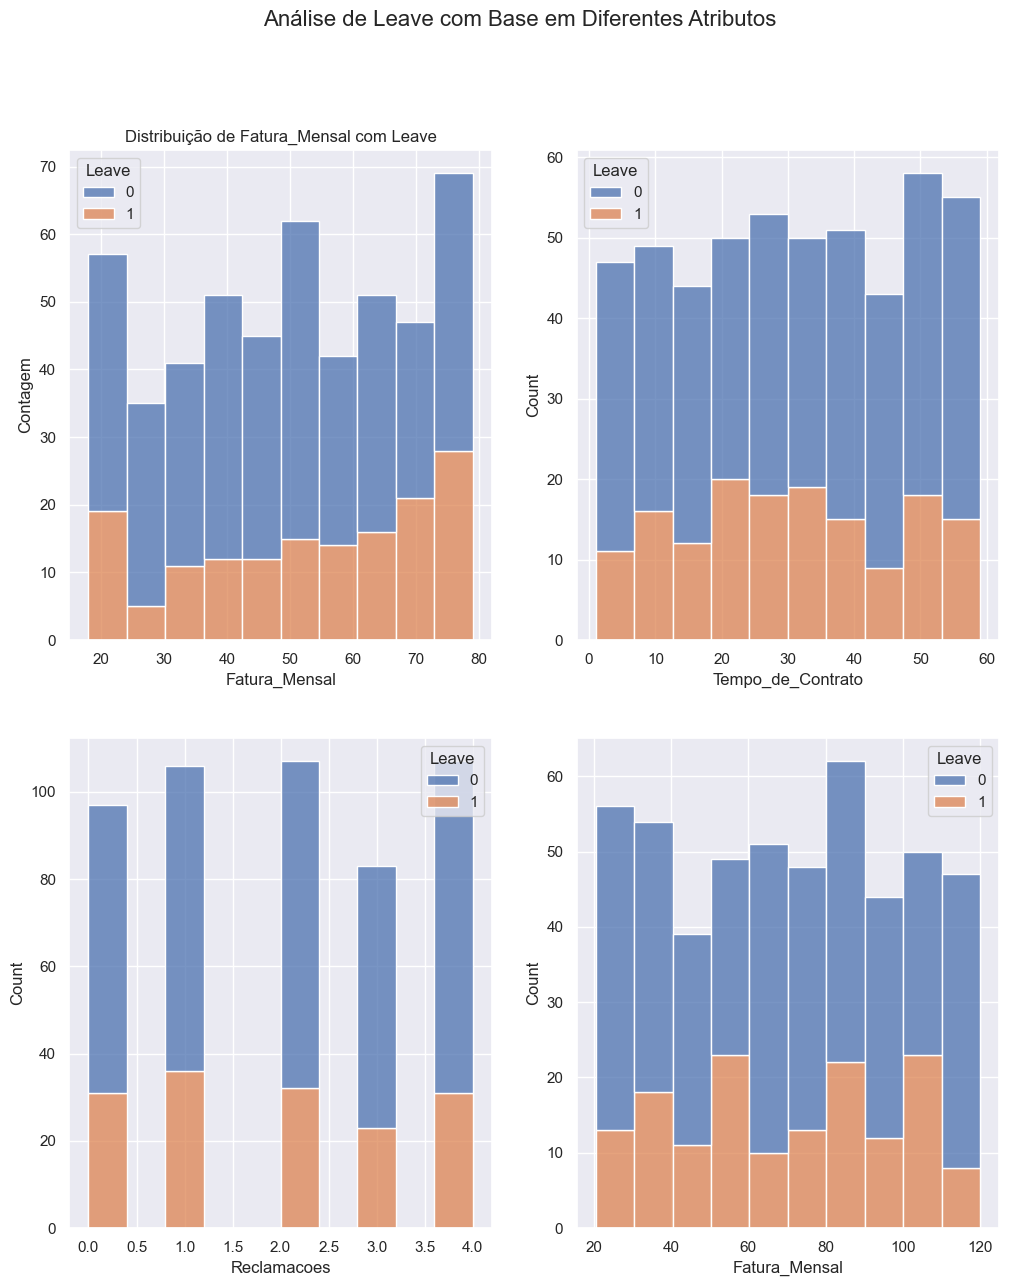

In [3]:



sns.set(style='darkgrid')

fig, axes = plt.subplots(2,2, figsize=(12, 14))
fig.suptitle("Análise de Leave com Base em Diferentes Atributos", fontsize=16)


sns.histplot(data=dataset, x='Idade', hue='Leave', multiple='stack', ax=axes[0, 0])
axes[0, 0].set_title("Distribuição de Idade com Leave")
axes[0, 0].set_xlabel("Idade")
axes[0, 0].set_ylabel("Contagem")

sns.histplot(data=dataset, x='Tempo_de_Contrato', hue='Leave', multiple='stack', ax=axes[0, 1])
axes[0, 0].set_title("Distribuição de Tempo_de_Contrato com Leave")
axes[0, 0].set_xlabel("Tempo_de_Contrato")
axes[0, 0].set_ylabel("Contagem")

sns.histplot(data=dataset, x='Reclamacoes', hue='Leave', multiple='stack', ax=axes[1, 0])
axes[0, 0].set_title("Distribuição de Reclamacoes com Leave")
axes[0, 0].set_xlabel("Reclamacoes")
axes[0, 0].set_ylabel("Contagem")

sns.histplot(data=dataset, x='Fatura_Mensal', hue='Leave', multiple='stack', ax=axes[1, 1])
axes[0, 0].set_title("Distribuição de Fatura_Mensal com Leave")
axes[0, 0].set_xlabel("Fatura_Mensal")
axes[0, 0].set_ylabel("Contagem")

Definir as camdadas de entrada e as de saida, como X iremos ter os atributos e em Y o target(Leave)

In [4]:
X = dataset.drop(columns='Leave').values
y = dataset['Leave'].values

#X,Y

Agora será feita a divisão do dataset onde 80% irá ser utilizado para treino e 20% será utilizado para teste. Para tal irei utilizar a biblioteca de sklearn (train_test_slpit) https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html

Onde sao definidos os X e Y de entrada e a respetiva percentagem de treino e teste

random_state
int, RandomState instance or None, default=None
Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_train, X_test, y_train, y_test

Neste passo foi feita uma normalizaçao de X_train e X_test mais uma vez recorrendo a sklearn e utilizando StandartScaler
 https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html

In [6]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
X_train, X_test

(array([[0.1147541 , 0.4137931 , 0.        , 0.5       , 0.22362996],
        [0.3442623 , 0.9137931 , 0.5       , 0.25      , 0.07642031],
        [0.03278689, 0.5862069 , 0.5       , 0.25      , 0.30718954],
        ...,
        [0.91803279, 0.44827586, 1.        , 0.5       , 0.9918552 ],
        [0.47540984, 0.13793103, 1.        , 0.25      , 0.16953243],
        [0.57377049, 0.79310345, 0.5       , 1.        , 0.42292609]]),
 array([[0.91803279, 0.12068966, 0.5       , 0.        , 0.06485671],
        [0.44262295, 0.79310345, 0.5       , 0.75      , 0.52438411],
        [0.8852459 , 0.89655172, 0.        , 0.75      , 0.66053293],
        [0.13114754, 0.51724138, 1.        , 0.25      , 0.61558572],
        [0.49180328, 0.53448276, 0.5       , 0.25      , 0.36812469],
        [0.63934426, 0.79310345, 1.        , 0.25      , 0.14831574],
        [0.55737705, 0.74137931, 1.        , 0.5       , 0.46284565],
        [0.96721311, 0.36206897, 1.        , 0.25      , 0.90910005],
     

Neste ponto foi definido a forma da rede neural, como temos 5 atributos e 1 target teremos como entrada 5 neuronios e de saida 1 neuronio, a duvida foi definir o numero de neuronios das camadas ocultas, bem como o numero de camadas ocultas. Retirei algumas informacoes de : https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw 

Conclui que uma abordagem comum é usar uma quantidade de neuronios que seja a média do número de neuronios de entrada e saída.
Com 5 neurônios na entrada e 1 na saída, a média seria 3 por isso obtei por esse numero


In [7]:
import rede_neuronal
from rede_neuronal import RedeNeuronal, sig, ERROS

forma = [5, 3, 1]
phi = sig

rede = RedeNeuronal(forma, sig)



Defini os valores necessarios para a funcao treinar, como taxa de aprendizagem, erro maximo, numero de épocas etc, fui ajustando ate ter a melhor taxa de certeza

In [8]:
n_epocas = 1000
erro_max = 0.0001
alpha = 0.2
beta = 0.4

Neste ponto foi defindo o Y_train, para poder treinar a rede. De seguida preveu-se os resultados do target com base no dataset de teste. Esse resultado foi armazanado no previsoes, e de forma a saber a taxa de certeza determinou-se a media de resultados que que eram iguais na previsao de y e no teste

In [9]:

Y_train = [[y] for y in y_train]  


rede.treinar(X_train, Y_train, n_epocas, erro_max, alpha, beta)

previsoes = rede.prever(X_test)
previsoes = [1 if p[0] >= 0.5 else 0 for p in previsoes]  

taxa_certeza = np.mean(previsoes == y_test) * 100
print(f"Taxa de Certeza: {taxa_certeza:.2f}%")

Taxa de Certeza: 68.00%


Neste ponto foi feito um plot do erro

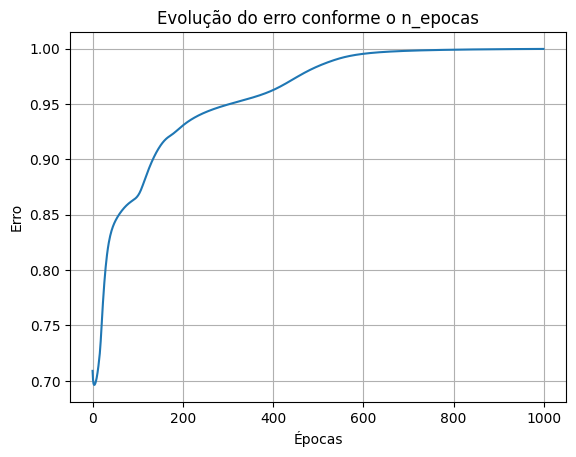

In [10]:
import matplotlib.pyplot as plt

plt.plot(ERROS)
plt.xlabel("Épocas")
plt.ylabel("Erro")
plt.title("Evolução do erro conforme o n_epocas")
plt.grid()

Confusion Matrix

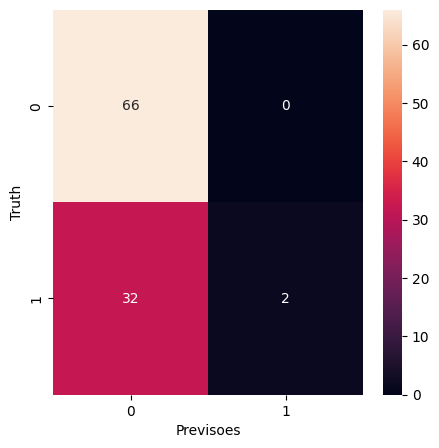

In [11]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, previsoes)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Previsoes')
plt.ylabel('Truth')
plt.show()



CONCLUSÃO: Não fiquei satisfeito com o resultado, a taxa de certeza roundou entre os 63% e 67% o que creio que até não foi mau tendo em conta a complexidade baixa da rede. Contudo a evolução do erro supreendeu-me pela negativa, tentei procurar o porque daquele comportamento e tentei alterar a forma da rede e as taxas de aprendizagem mas o resultado era o mesmo. Pertendo, se possivel, esclarecer este erro com o professor e aprimorar este resultado até à entrega do resultado final.